# Analyse de l'évolution des prix de l'immobilier avec Python - LES PLUS BEAUX LOGIS DE PARIS <a class="anchor" id="sommaire"></a>

## Table des matières

* [Milestone 1 - Analyse des données](#Milestone1)
    * [1.Type des données](#section_1_1)
    * [2.Nombre de transactions](#section_1_2)
    * [3.Interval de l'historique des données](#section_1_3)
    * [4.Analyse descriptive](#section_1_4)
        * [Evolution du prix au metre carré des appartements dans Paris](#section_1_4_1)
        * [Visualisation de la hausse moyenne des prix à Paris](#section_1_4_2)
        * [Différences de prix au metre carré entre les arrondissements](#section_1_4_3)
        * [Représentation visuelle du nombre de transactions d'appartement par arrondissement](#section_1_4bis_3)
        * [Visualisation de l'évolution du prix au m2 dans les 20 arrondissements ](#section_1_4_4)
        * [Prix au metre carré par transaction dans un arrondissement ](#section_1_4_5)
        * [Visualisation historique des transactions dans le sixième arrondissement ](#section_1_4_6)
        * [Vérification de la correlation prix au m²/ date par Pearson ](#section_1_4_7)  
        * [Vérification de la relation entre la valeur fonciere et la surface ](#section_1_4_8)
        * [Analyse des locaux industriels, commerciaux et assimilés ](#section_1_4_9)
        * [Visualisation de l'évolution des prix au m2 pour les appartements et les locaux commerciaux ](#section_1_4_10)
* [Milestone 2 - Entraînement de l'algorithme](#Milestone2)
    * [Encodage du jeu de données historique_immobilier](#section_2_1)
        * [Transformation de la variable type_local grâce au one hot encoder Pandas (get_dummies) dans le jeu de données historique](#section_2_1_1)
        * [Transformation de la variable code_postal grâce au one hot encoder sklearn](#section_2_1_2)
    * [Entraînement et score R^2](#section_2_2)
        * [Pourcentage d'erreur moyenne sur la prédiction](#section_2_2_1)
* [Milestone 3 - Prédiction définitive pour le client](#Milestone3)
    * [Encodage du jeu de données du portefeuille d'actifs](#section_3_1)
        * [Transformation de la variable type_local grâce au one hot encoder Pandas (get_dummies)](#section_3_1_1)
        * [Transformation de la variable code_postal grâce au one hot encoder sklearn](#section_3_1_2)
    * [Valorisation prédictive du segment d'actifs particulier](#section_3_2)
    * [Valorisation prédictive du segment d'actifs pro](#section_3_3)
    * [Réalisation d'un T-test](#section_3bis_3)
    * [Conclusion](#section_3_4)
* [Milestone 4 - Classification Kmeans](#Milestone4)
    * [Préparation des données](#section_4_1)
    * [Utilisation de l'algorithme Kmeans et labellisation](#section_4_2)
    * [Performance du modèle en tant qu'outil de classification](#section_4_3)
* [Milestone 5 - Analyse et présentation des résultats](#Milestone5)



# Milestone 1 - Analyse des données <a class="anchor" id="Milestone1"></a>

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1. Type des données <a class="anchor" id="section_1_1"></a>

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [7]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# La ligne qui suit sert à afficher toutes les colonnes des dataframes jusqu'à 999.
pd.options.display.max_columns=999
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [8]:
#On importe les données dans un dataframe Pandas

historique_immo=pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [10]:
#On vérifie que le type des données attribué par pandas est cohérent
historique_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


=> Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [12]:
#historique_immo.describe (include="all")
# Pas très lisible, mieux vaut faire 2 describe distincts

In [13]:
historique_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [14]:
historique_immo.tail()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13
26195,2021-03-19,3.694294e+05,190,RUE SAINT-DENIS,75002,Paris 2e Arrondissement,2,Appartement,32


In [15]:
# Describe des variables numériques
historique_immo.describe ()

,date_mutation,valeur_fonciere,adresse_numero,code_postal,code_type_local,surface_reelle
count,26196,2.619600e+04,26196.000000,26196.000000,26196.000000,26196.000000
mean,2019-06-09 14:09:14.099862784,4.916170e+05,47.449572,75012.716216,2.140709,46.859940
min,2017-01-02 00:00:00,8.519470e+04,1.000000,75001.000000,2.000000,11.000000
25%,2018-03-14 00:00:00,2.339439e+05,10.000000,75009.000000,2.000000,23.000000
50%,2019-05-23 00:00:00,3.545774e+05,27.000000,75014.000000,2.000000,35.000000
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,75017.000000,2.000000,55.000000
max,2021-12-31 00:00:00,3.843359e+07,407.000000,75020.000000,4.000000,3945.000000
std,NaN,5.713292e+05,55.733432,5.269150,0.511496,52.408062


In [16]:
# Describe des variables catégorielles
historique_immo.describe (include=['object','category'])

,adresse_nom_voie,nom_commune,type_local
count,26196,26196,26196
unique,2874,20,2
top,RUE DE VAUGIRARD,Paris 18e Arrondissement,Appartement
freq,137,2925,24353


In [17]:
# Affiche le nom des colonnes du Dataframe (pour info)
historique_immo.columns

Index(['date_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_nom_voie', 'code_postal', 'nom_commune', 'code_type_local',
       'type_local', 'surface_reelle'],
      dtype='object')

Quelle est la liste des différents biens immobiliers dans les données historiques ?

In [19]:
# Accéder à plusieurs colonnes du Dataframe
historique_immo['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [20]:
# Solution de code affichant un tableau croisé grâce à la fonction crosstab
pd.crosstab(index=historique_immo['type_local'], columns=historique_immo['code_type_local'])

code_type_local,2,4
type_local,,
Appartement,24353,0
Local industriel. commercial ou assimilé,0,1843


=> On observe qu'il y a 2 types de biens - 'Appartement' et 'Local industriel. commercial ou assimilé' -, et que leurs codes types sont 2 et 4. 

## 2. Nombre de transactions <a class="anchor" id="section_1_2"></a>

### On verifie le nombre de transactions que nous avons dans notre dataframe

In [24]:
#Dimension du Dataframe (Nb de ligne, nb de colonne)
print('Le nombre de transactions dans les données est de :', historique_immo.shape[0])

Le nombre de transactions dans les données est de : 26196


In [25]:
#filtre des lignes contenant la valeur "2" dans la colonne "code_type_local"
transactions_appartement = historique_immo['code_type_local'].value_counts()[2]
print('Le nombre de transactions pour les appartements dans les données est de :', transactions_appartement)

Le nombre de transactions pour les appartements dans les données est de : 24353


In [26]:
transactions_local = historique_immo['code_type_local'].value_counts()[4]
print('Le nombre de transactions pour les locaux commerciaux dans les données est de :', transactions_local)

Le nombre de transactions pour les locaux commerciaux dans les données est de : 1843


## 3. Interval de l'historique des données <a class="anchor" id="section_1_3"></a>

In [28]:
#On vérifie également la plage de l'historique disponible
min_date = historique_immo['date_mutation'].min()
max_date = historique_immo['date_mutation'].max()

print('La première date de transaction dans les données est le :', min_date)
print('La dernière date de transaction dans les données est le :', max_date)

La première date de transaction dans les données est le : 2017-01-02 00:00:00
La dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## 4. Analyse <a class="anchor" id="section_1_4"></a>

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [31]:
# Calcul et création de la colonne 'prix_au_m2'
historique_immo['prix_au_m2'] = round (historique_immo['valeur_fonciere'] / historique_immo['surface_reelle'],2)

In [32]:
historique_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


Maintenant, analysons les appartements.

###  Evolution du prix au metre carré des appartements dans Paris <a class="anchor" id="section_1_4_1"></a>

In [35]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
#suppression des variables (colonnes) inutiles pour l'analyse
historique_immo_appart = historique_immo.drop (['adresse_numero','adresse_nom_voie','nom_commune','code_type_local'],axis=1)

In [36]:
historique_immo_appart.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.11


In [37]:
historique_immo_appart.shape

(26196, 6)

In [38]:
#lignes contenant la valeur "Local industriel. commercial ou assimilé" dans la colonne "type_local"
Local = historique_immo_appart[historique_immo_appart['type_local']=='Local industriel. commercial ou assimilé']

In [39]:
Local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 18 to 26192
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    1843 non-null   datetime64[ns]
 1   valeur_fonciere  1843 non-null   float64       
 2   code_postal      1843 non-null   int64         
 3   type_local       1843 non-null   object        
 4   surface_reelle   1843 non-null   int64         
 5   prix_au_m2       1843 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 100.8+ KB


In [40]:
Local.describe(include='all')

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_m2
count,1843,1.843000e+03,1843.000000,1843,1843.000000,1843.000000
unique,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,Local industriel. commercial ou assimilé,NaN,NaN
freq,NaN,NaN,NaN,1843,NaN,NaN
mean,2019-07-22 01:04:51.047205376,1.025025e+06,75011.147585,NaN,87.734129,11705.022854
min,2017-01-03 00:00:00,1.085577e+05,75001.000000,NaN,11.000000,7916.140000
25%,2018-05-15 00:00:00,3.738322e+05,75007.000000,NaN,33.000000,10609.670000
50%,2019-07-19 00:00:00,6.170932e+05,75011.000000,NaN,53.000000,11322.010000
75%,2020-10-05 00:00:00,1.145400e+06,75016.000000,NaN,98.000000,12728.470000
max,2021-12-31 00:00:00,3.843359e+07,75020.000000,NaN,3945.000000,15547.800000


In [41]:
# Data frame contenant uniquement les apppartements
appart = historique_immo_appart[historique_immo_appart['type_local'] == 'Appartement']

In [42]:
appart.shape

(24353, 6)

In [43]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
appart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, 0 to 26195
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    24353 non-null  datetime64[ns]
 1   valeur_fonciere  24353 non-null  float64       
 2   code_postal      24353 non-null  int64         
 3   type_local       24353 non-null  object        
 4   surface_reelle   24353 non-null  int64         
 5   prix_au_m2       24353 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [44]:
appart = appart.drop (['type_local'],axis=1)

In [45]:
vue1 = appart[['date_mutation','prix_au_m2']].groupby(appart.date_mutation.dt.year).mean()
vue1.drop(['date_mutation'],axis=1)

,prix_au_m2
date_mutation,
2017,9492.859239
2018,10031.403469
2019,10562.712563
2020,10674.872719
2021,10455.600179


On constate sur la moyenne des prix de vente des appartements à Paris que ce prix progresse entre 2017 et 2020 pour finir par diminuer entre 2020 et 2021.
Nous allons créer un graphique pour mieux le visualiser.

###  Visualisation de la hausse moyenne des prix à Paris <a class="anchor" id="section_1_4_2"></a>

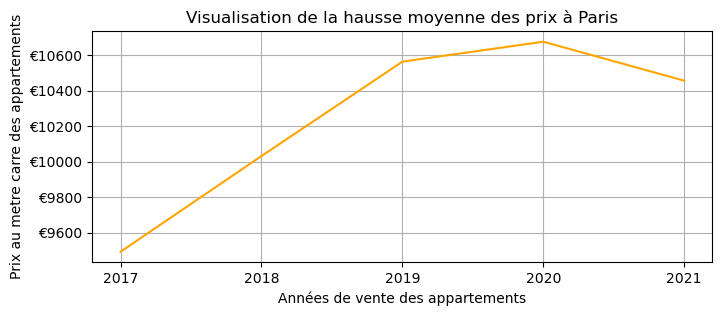

In [48]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix

plt.figure(figsize=(8,3))
plt.plot(['2017','2018','2019','2020','2021'],vue1['prix_au_m2'], color='orange')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix à Paris')
plt.show()

In [49]:
print("Le prix moyen au metre carré sur l'intervalle historique des appartements est de :", round(vue1['prix_au_m2'].mean(),2),'€')

Le prix moyen au metre carré sur l'intervalle historique des appartements est de : 10243.49 €


### Différences de prix au metre carré entre les arrondissements <a class="anchor" id="section_1_4_3"></a>

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

### Liste des codes postaux dans nos données et nombre de transactions d'appartement par code postal

In [53]:
liste_arrondissements = appart['code_postal'].value_counts().sort_index()

In [54]:
etiquette = liste_arrondissements.index
etiquette

Index([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010,
       75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020],
      dtype='int64', name='code_postal')

In [55]:
appart.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,75003,50,11011.19
1,2017-01-12,1.576492e+06,75008,163,9671.73
2,2017-01-10,6.577574e+05,75008,66,9966.02
3,2017-01-10,2.500868e+05,75003,22,11367.58
4,2017-01-13,1.762667e+05,75001,15,11751.11


In [56]:
nb_by_cp = appart['code_postal'].value_counts()
nb_by_cp

code_postal
75018    2805
75015    2308
75017    2212
75016    1947
75011    1932
75020    1528
75014    1248
75010    1227
75019    1091
75012    1036
75009     969
75013     870
75005     829
75003     784
75006     709
75002     666
75008     628
75007     607
75004     548
75001     409
Name: count, dtype: int64

In [57]:
type(nb_by_cp)

pandas.core.series.Series

### Représentation visuelle du nombre de transactions d'appartement par code postal <a class="anchor" id="section_1_4bis_3"></a>

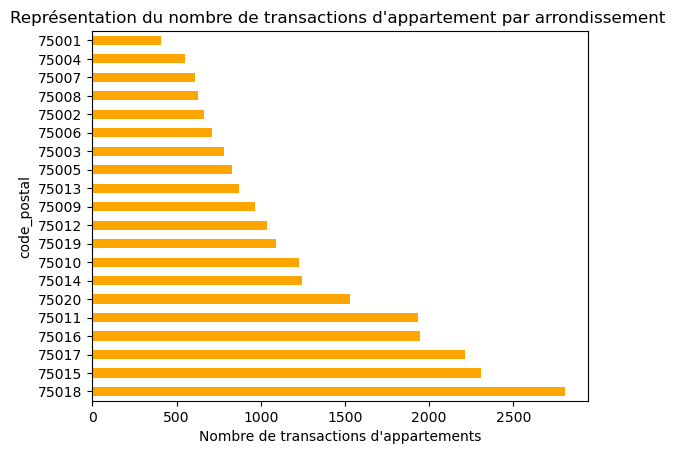

In [59]:
nb_by_cp.plot(kind='barh', color='orange')
plt.title("Représentation du nombre de transactions d'appartement par arrondissement ")
plt.xlabel("Nombre de transactions d'appartements")
plt.show()

In [60]:
#Calcul du prix moyen du m2 par arrondissement
prix_m2_moyen_par_arrondissement = round(appart.groupby('code_postal',as_index=False)['prix_au_m2'].mean(),2)
prix_m2_moyen_par_arrondissement

,code_postal,prix_au_m2
0,75001,12833.90
1,75002,11667.52
2,75003,12465.63
3,75004,13123.57
4,75005,12295.09
5,75006,13143.51
6,75007,12649.30
7,75008,10948.82
8,75009,10476.60
9,75010,9655.44


In [61]:
#Créons un dataframe pour une autre visualisation avec l'évolution des prix par arrondissement
appart['annee'] = appart['date_mutation'].dt.year

In [62]:
appart.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_au_m2,annee
0,2017-01-03,5.505597e+05,75003,50,11011.19,2017
1,2017-01-12,1.576492e+06,75008,163,9671.73,2017
2,2017-01-10,6.577574e+05,75008,66,9966.02,2017
3,2017-01-10,2.500868e+05,75003,22,11367.58,2017
4,2017-01-13,1.762667e+05,75001,15,11751.11,2017


In [63]:
evolution_prix_m2 = appart[['annee','prix_au_m2','code_postal']].groupby(['code_postal','annee'],as_index=False).mean()
evolution_prix_m2

,code_postal,annee,prix_au_m2
0,75001,2017,11762.706207
1,75001,2018,12621.226327
2,75001,2019,13269.256593
3,75001,2020,13405.991429
4,75001,2021,13379.498571
...,...,...,...
95,75020,2017,7886.023280
96,75020,2018,8485.163065
97,75020,2019,9093.992566
98,75020,2020,9329.305238


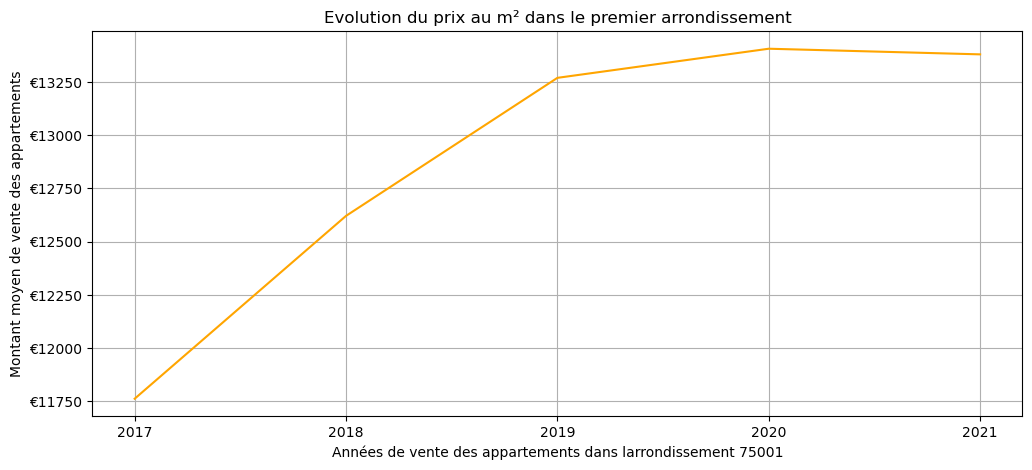

In [64]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

plt.figure(figsize=(12,5))
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75001]['prix_au_m2'],color='orange')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

### Visualisation de l'évolution du prix au m2 dans les 20 arrondissements <a class="anchor" id="section_1_4_4"></a>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


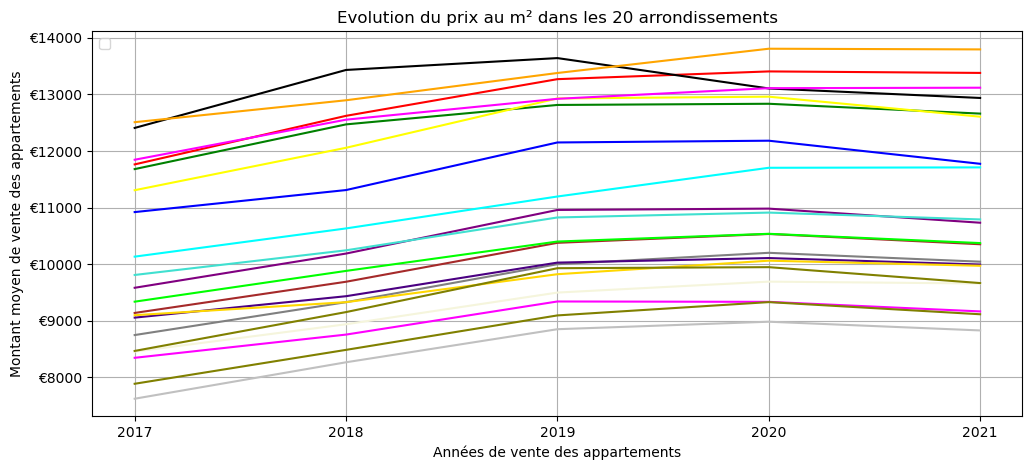

In [67]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris

plt.figure(figsize=(12,5))
interval_historique=['2017','2018','2019','2020','2021']

plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75001]['prix_au_m2'],color='red')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75002]['prix_au_m2'],color='blue')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75003]['prix_au_m2'],color='green')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75004]['prix_au_m2'],color='black')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75005]['prix_au_m2'],color='yellow')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75006]['prix_au_m2'],color='orange')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75007]['prix_au_m2'],color='magenta')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75008]['prix_au_m2'],color='cyan')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75009]['prix_au_m2'],color='purple')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75010]['prix_au_m2'],color='grey')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75011]['prix_au_m2'],color='brown')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75012]['prix_au_m2'],color='beige')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75013]['prix_au_m2'],color='fuchsia')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75014]['prix_au_m2'],color='indigo')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75015]['prix_au_m2'],color='gold')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75016]['prix_au_m2'],color='turquoise')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75017]['prix_au_m2'],color='lime')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75018]['prix_au_m2'],color='olive')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75019]['prix_au_m2'],color='silver')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_m2.loc[evolution_prix_m2['code_postal']==75020]['prix_au_m2'],color='olive')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement il y a une diminution ou une stabilisation des prix de vente en 2020.

### Prix au metre carré par transaction dans un arrondissement <a class="anchor" id="section_1_4_5"></a>

In [70]:
# Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
# Nombre de transaction d'appartement dans le 6ème arrondissement de 2017 à 2021
value = appart.value_counts(subset='code_postal')[75006]
value

709

### Visualisation historique des transactions dans le sixième arrondissement <a class="anchor" id="section_1_4_6"></a>

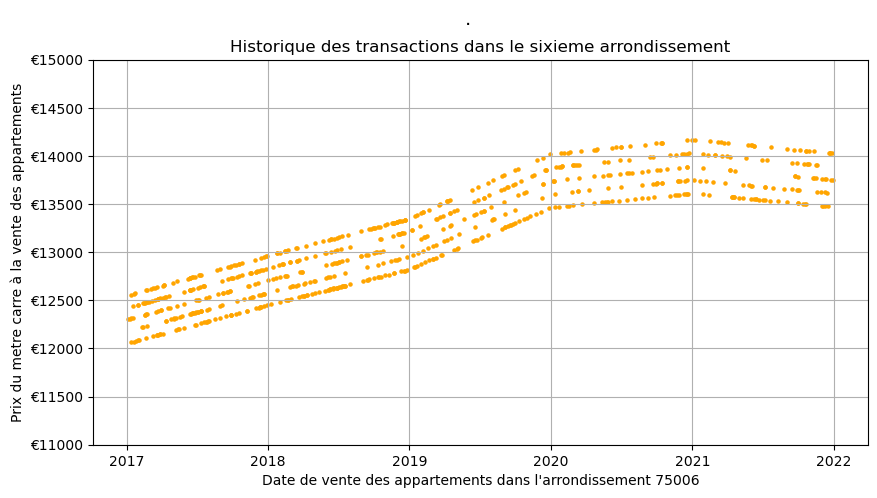

In [72]:
# Affichons l'historique des transactions pour visualiser la dispersion des données

cp=75006
plt.figure(figsize=(10,5))

plt.scatter(appart.loc[appart['code_postal']==cp]['date_mutation'],appart.loc[appart['code_postal']==cp]['prix_au_m2'], s=5, color='orange')

plt.xlabel("Date de vente des appartements dans l'arrondissement 75006")
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(11000,15000)
plt.grid(which='both')
plt.suptitle('.', fontsize=14)
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()


=> On observe que les points sont presque tous alignés.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### <a class="anchor" id="section_1_4_7"></a> Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson  

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [76]:
import scipy.stats as stats
import numpy as np
stats.pearsonr((appart.loc[appart['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9), appart.loc[appart['code_postal']==75006]['prix_au_m2'])

PearsonRResult(statistic=0.9038445780332467, pvalue=7.109002386550491e-263)

Le coefficient de corrélation est de 0.90 soit très proche de 1. La valeur de la pvalue est extrêmement faible (7.109002386550491e-263) : la correlation est statistiquement significative. Nous pouvons confirmer la corrélation positive c'est à dire la relation entre le 'prix_au_m2' et la date.

### Vérification de la relation entre la valeur fonciere et la surface  <a class="anchor" id="section_1_4_8"></a>

In [79]:
stats.pearsonr((appart.loc[appart['code_postal']==75006]['valeur_fonciere']), appart.loc[appart['code_postal']==75006]['surface_reelle'])

PearsonRResult(statistic=0.9977572898250283, pvalue=0.0)

Le coefficient de corrélation est de 0.997 soit extrêmement proche de 1 avec une pvalue de 0.0. La relation est donc confirmée et statistiquement significative. 

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### Analyse des locaux industriels, commerciaux et assimilés   <a class="anchor" id="section_1_4_9"></a>

In [83]:
#On crée un dataset qui ne contient que les locaux commerciaux
locaux_comm = historique_immo_appart[historique_immo_appart['type_local'] == 'Local industriel. commercial ou assimilé']
locaux_comm

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_m2
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.11
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.58
34,2017-02-20,3.802522e+05,75003,Local industriel. commercial ou assimilé,31,12266.20
91,2017-03-09,3.623842e+05,75001,Local industriel. commercial ou assimilé,29,12496.01
109,2017-03-29,3.159072e+05,75003,Local industriel. commercial ou assimilé,25,12636.29
...,...,...,...,...,...,...
26149,2021-01-13,1.903438e+05,75002,Local industriel. commercial ou assimilé,15,12689.58
26164,2021-01-26,4.487582e+05,75002,Local industriel. commercial ou assimilé,35,12821.66
26166,2021-01-13,6.409217e+05,75002,Local industriel. commercial ou assimilé,49,13080.03
26190,2021-02-26,5.131939e+05,75004,Local industriel. commercial ou assimilé,37,13870.11


In [84]:
# Retirons la colonne 'type_local' de ce df pour plus de visibilité car ce df a été filtré pour ne concerner que les locaux commerciaux
locaux_comm = locaux_comm.drop(['type_local'],axis=1)


In [85]:
locaux_comm.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_au_m2
18,2017-02-01,3.113277e+06,75003,250,12453.11
29,2017-02-17,1.164375e+06,75003,95,12256.58
34,2017-02-20,3.802522e+05,75003,31,12266.20
91,2017-03-09,3.623842e+05,75001,29,12496.01
109,2017-03-29,3.159072e+05,75003,25,12636.29


In [86]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
vue3 = round (locaux_comm[['date_mutation','prix_au_m2']].groupby(locaux_comm.date_mutation.dt.year).mean(),2)
vue3.drop(['date_mutation'],axis=1)

,prix_au_m2
date_mutation,
2017,10949.91
2018,11569.50
2019,11960.13
2020,11966.47
2021,12006.49


### Visualisation de l'évolution des prix au m2 pour les appartements et les locaux commerciaux   <a class="anchor" id="section_1_4_10"></a>

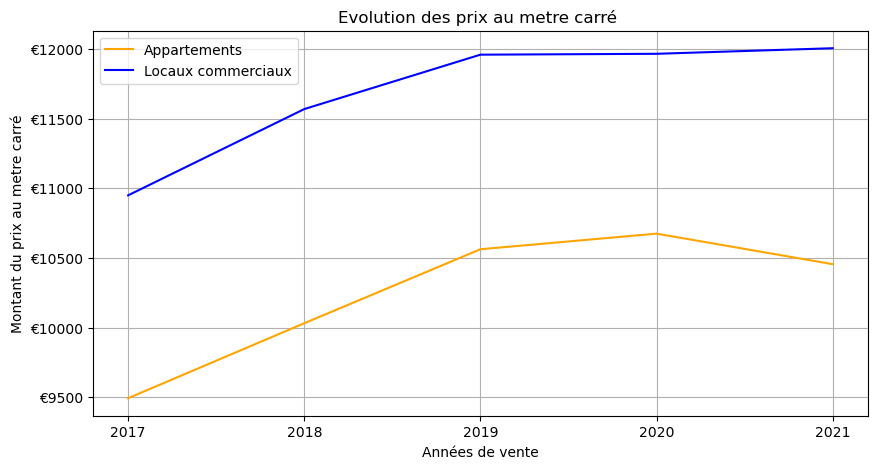

In [88]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,5))
plt.plot(['2017','2018','2019','2020','2021'],vue1['prix_au_m2'],label='Appartements',color ='orange')
plt.plot(['2017','2018','2019','2020','2021'],vue3['prix_au_m2'],label='Locaux commerciaux',color ='blue')

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

In [89]:
print("Le prix moyen au metre carré sur l'intervalle historique des locaux commerciaux est de :", round(vue3['prix_au_m2'].mean(),2),'€')

Le prix moyen au metre carré sur l'intervalle historique des locaux commerciaux est de : 11690.5 €


=> Le graphique ci-dessus montre que le type de bien a une influence sur le prix au m2. Le prix d'un local commercial est significativement plus élevé que celui d'un appartement et continue de progresser quand celui des appartements fléchit. 
Cette différence de prix significative (delta) nous permettra par la suite de créer des groupes. 

Enfin, vérifions s'il y a correlation entre la valeur foncière  et la superficie des locaux commerciaux. 

In [92]:
stats.pearsonr(locaux_comm['valeur_fonciere'],locaux_comm['surface_reelle'])

PearsonRResult(statistic=0.9861219712052036, pvalue=0.0)

Le coefficient de corrélation est de 0.986 soit extrêmement proche de 1 avec une pvalue de 0.0. La relation est donc confirmée et statistiquement significative. 

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme<a class="anchor" id="Milestone2"></a>

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [98]:
historique_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


## Encodage du jeu de données historique_immobilier <a class="anchor" id="section_2_1"></a>

### <a class="anchor" id="section_2_1_1"></a> Transformation de la variable type_local grâce au one hot encoder Pandas (get_dummies) dans le jeu de données historique 

In [101]:
historique_immo['type_local'].nunique()

2

In [102]:
historique_immo['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [103]:
df_encoded = pd.get_dummies(historique_immo, columns=['type_local', ])
df_encoded

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,surface_reelle,prix_au_m2,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,50,11011.19,True,False
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,163,9671.73,True,False
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,66,9966.02,True,False
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,22,11367.58,True,False
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,15,11751.11,True,False
...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,37,12735.78,True,False
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,150,13215.54,False,True
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,26,12016.77,True,False
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,13,12017.18,True,False


In [104]:
df_encoded = df_encoded.replace({True: 1, False: 0})
df_encoded

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_19734/3639597318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,surface_reelle,prix_au_m2,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,50,11011.19,1,0
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,163,9671.73,1,0
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,66,9966.02,1,0
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,22,11367.58,1,0
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,15,11751.11,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,37,12735.78,1,0
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,150,13215.54,0,1
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,26,12016.77,1,0
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,13,12017.18,1,0


### Transformation de la variable code_postal grâce au one hot encoder sklearn <a class="anchor" id="section_2_1_2"></a>

In [106]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
labels = enc.fit_transform(df_encoded.code_postal.values.reshape(-1, 1)).toarray()
labels.shape

(26196, 20)

In [107]:
df_encoded['code_postal'].unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002])

On a 20 colonnes correspondant aux nb de valeurs prises par code_postal.

In [109]:
df_encoded = pd.concat([df_encoded,
        pd.DataFrame(columns = ['is_75001','is_75002','is_75003','is_75004','is_75005','is_75006','is_75007','is_75008','is_75009','is_75010','is_75011','is_75012','is_75013','is_75014','is_75015','is_75016','is_75017','is_75018','is_75019','is_75020'],
                      data = labels[:, :20])],
        axis = 1)

In [110]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   date_mutation                                        26196 non-null  datetime64[ns]
 1   valeur_fonciere                                      26196 non-null  float64       
 2   adresse_numero                                       26196 non-null  int64         
 3   adresse_nom_voie                                     26196 non-null  object        
 4   code_postal                                          26196 non-null  int64         
 5   nom_commune                                          26196 non-null  object        
 6   code_type_local                                      26196 non-null  int64         
 7   surface_reelle                                       26196 non-null  int64         
 

In [111]:
df_encoded.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,surface_reelle,prix_au_m2,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,50,11011.19,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,163,9671.73,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,66,9966.02,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,22,11367.58,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,15,11751.11,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Suppression des colonnes inutiles dans le df avant entraînement
df_encoded = df_encoded.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_type_local','date_mutation','prix_au_m2'],axis=1)

In [113]:
df_encoded.head()

,valeur_fonciere,code_postal,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020
0,5.505597e+05,75003,50,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.576492e+06,75008,163,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.577574e+05,75008,66,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.500868e+05,75003,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.762667e+05,75001,15,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [115]:
# on choisit un modèle de régression linéaire 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [116]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# Les variables prédictives
# Note : attention, ici j'utilise toutes les variables du df_encoded à l'exclusion de valeur_fonciere (variable à prédire) 
# et de code_postal (catégorielle et non-numérisé)

X = df_encoded.drop(['valeur_fonciere','code_postal'],axis=1)

# La valeur y à trouver est la valeur foncière (variable cible)
y = df_encoded.valeur_fonciere

# On scinde une partie du dataset en train (entrainement) et test (évaluation) avec la fonction train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### => Note : On entraine l'algorithme sur un dataset contenant uniquement les variables prédictives et de type quantitatives !!!! Ici, surface_reelle, type_local_Appartement, type_local_Local industriel. commercial ou assimilé et les 20 variables de code postal numérisés.

## Entraînement et score R^2 <a class="anchor" id="section_2_2"></a>

In [119]:
# On entraîne l'algorithme

reg.fit(X_train, y_train)

LinearRegression()

In [120]:
# et on obtient directement un score (le R2 mesure les variations de la variable cible expliquées par le modèle de 0 mauvais à 1 très bon)
print(f"R^2 : {np.round(reg.score(X, y), 3)}")

R^2 : 0.98


> Comme il s'agit d'une régression linéaire, le modèle que nous venons d'entraîner s'exprime comme suit :
Valeur foncière estimée = intercept + a * surface_reelle + b * type_local_Appartement + c * type_local_Local industriel. commercial ou assimilé + d * is_75001 + e * is_75002 + f * is_75003 + [....] + n23 * is_75020 + bruit

In [122]:
print(f" valeur_fonciere = {np.round(reg.coef_[0],  2)} * surface_reelle + {np.round(reg.coef_[1],  2)} * type_local_Appartement + {np.round(reg.coef_[2],  2)}  * type_local_Local industriel. commercial ou assimilé + {np.round(reg.coef_[3],  2)} * is_75001 \
+ {np.round(reg.coef_[4],  2)} * is_75002 + {np.round(reg.coef_[5],  2)} * is_75003 + {np.round(reg.coef_[6],  2)} * is_75004 + {np.round(reg.coef_[7],  2)} * is_75005 + \
{np.round(reg.coef_[8],  2)} * is_75006 + {np.round(reg.coef_[9],  2)} * is_75007 + {np.round(reg.coef_[10],  2)} * is_75008 + {np.round(reg.coef_[11],  2)} * is_75009 + {np.round(reg.coef_[12],  2)} * is_75010 + {np.round(reg.coef_[13],  2)} * is_75011 + \
{np.round(reg.coef_[14],  2)} * is_75012 + {np.round(reg.coef_[15],  2)} * is_75013 + {np.round(reg.coef_[16],  2)} * is_750014 + {np.round(reg.coef_[17],  2)} * is_75015 + {np.round(reg.coef_[18],  2)} * is_75016 + {np.round(reg.coef_[19],  2)} * is_75017 + \
{np.round(reg.coef_[20],  2)} * is_75018 + {np.round(reg.coef_[21],  2)} * is_75019 + {np.round(reg.coef_[22],  2)} * 75020 + du bruit")

 valeur_fonciere = 10652.02 * surface_reelle + -43823.91 * type_local_Appartement + 43823.91  * type_local_Local industriel. commercial ou assimilé + 103115.52 * is_75001 + 32944.09 * is_75002 + 72797.4 * is_75003 + 115979.95 * is_75004 + 57470.07 * is_75005 + 128502.23 * is_75006 + 109520.0 * is_75007 + 27567.08 * is_75008 + -19192.09 * is_75009 + -55622.91 * is_75010 + -35625.43 * is_75011 + -70434.75 * is_75012 + -74252.84 * is_75013 + -49395.75 * is_750014 + -53797.71 * is_75015 + -16800.45 * is_75016 + -37229.2 * is_75017 + -54987.57 * is_75018 + -97409.84 * is_75019 + -83147.8 * 75020 + du bruit


In [123]:
#on effectue la prédiction
y_pred_test = reg.predict(X_test)

In [124]:
y_pred_test

array([228593.32264741, 294982.53481562, 262491.29809182, ...,
       211946.67366458, 117158.82446013, 337241.26286603])

### Pourcentage d'erreur moyenne sur la prédiction <a class="anchor" id="section_2_2_1"></a>

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print(f"RMSE: {mean_squared_error(y_test, y_pred_test)**0.5}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE: 81129.60841991533
MAPE: 0.09831973063180324


Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Avec un R^2 à 0.98, on peut conclure que le modèle est très bon pour prédire la valeur foncière en fonction des différentes variables (98% de la variation de la valeur foncière peut être expliquée par les différentes variables de prédiction).
- La valeur du RMSE m'indique que la régression peut être améliorée (poids important des valeurs extrêmes).
- Notre algorithme fait donc 9,8 % d'erreur en moyenne sur la prédiction de la valeur foncière soit < à 10%, ce qui est très acceptable.
- On pourrait sans doute améliorer le modèle en ajoutant un terme quadratique pour effectuer une régression polynomiale car on peut constater que les visualisations sont légèrement courbes et non parfaitement linéaires.

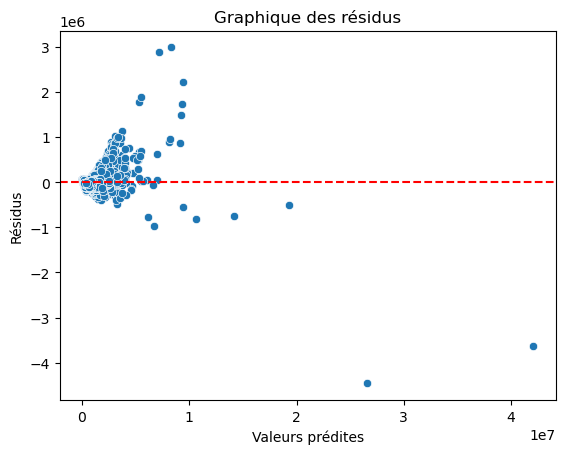

In [128]:
import seaborn as sns

# Calcul des résidus
residuals = y - reg.predict(X)

# Tracer un graphique des résidus par rapport aux valeurs prédites
sns.scatterplot(x=reg.predict(X), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.show()

=> Le nuage de points est plutôt aléatoire autour de zéro : cela suggère que le modèle est relativement adéquat. Cependant, on constate une série de points en haut et en bas de la ligne 0 qui a tendance à évoluer de façon linéaire (les résidus augmentent en valeur absolue avec les valeurs prédites). Ceci indique que la relation entre les variables n'est peut-être pas toujours linéaire. On identifie aussi quelques valeurs aberrantes : si elles avaient été supprimées, cela aurait sans doute pu améliorer la précision du modèle.  

# Milestone 3 - Prédiction définitive pour le client <a class="anchor" id="Milestone3"></a>

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

## Encodage du jeu de données du portefeuille d'actifs <a class="anchor" id="section_3_1"></a>

In [133]:
#On importe les données dans un dataframe
portefeuille_actifs=pd.read_excel('portefeuille_actifs.xlsx')

In [134]:
portefeuille_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [135]:
portefeuille_actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [136]:
portefeuille_actifs = portefeuille_actifs.drop (['adresse_numero','adresse_nom_voie','code_commune','nom_commune','surface_carrez','nombre_pieces_principales','longitude','latitude'],axis=1)

In [137]:
portefeuille_actifs.head()

,code_postal,code_type_local,type_local,surface_reelle_bati
0,75001,2,Appartement,25
1,75003,2,Appartement,22
2,75003,2,Appartement,65
3,75008,2,Appartement,74
4,75008,2,Appartement,22


In [138]:
portefeuille_actifs.rename(columns={"surface_reelle_bati": "surface_reelle"}, inplace=True)

In [139]:
portefeuille_actifs.describe(include='all')

,code_postal,code_type_local,type_local,surface_reelle
count,275.000000,275.000000,275,275.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Appartement,NaN
freq,NaN,NaN,154,NaN
mean,75012.425455,2.880000,NaN,50.843636
std,5.712460,0.994584,NaN,40.354193
min,75001.000000,2.000000,NaN,11.000000
25%,75009.000000,2.000000,NaN,26.500000
50%,75013.000000,2.000000,NaN,39.000000
75%,75017.500000,4.000000,NaN,58.000000


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

### Transformation de la variable type_local grâce au one hot encoder Pandas (get_dummies) <a class="anchor" id="section_3_1_1"></a>

In [142]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
portefeuille_actifs_encoded = pd.get_dummies(portefeuille_actifs, columns=['type_local', ])
portefeuille_actifs_encoded


,code_postal,code_type_local,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,75001,2,25,True,False
1,75003,2,22,True,False
2,75003,2,65,True,False
3,75008,2,74,True,False
4,75008,2,22,True,False
...,...,...,...,...,...
270,75019,4,16,False,True
271,75002,4,15,False,True
272,75002,4,35,False,True
273,75002,4,49,False,True


In [143]:
portefeuille_actifs_encoded = portefeuille_actifs_encoded.replace({True: 1, False: 0})
portefeuille_actifs_encoded

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_19734/3875579972.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  portefeuille_actifs_encoded = portefeuille_actifs_encoded.replace({True: 1, False: 0})


,code_postal,code_type_local,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,75001,2,25,1,0
1,75003,2,22,1,0
2,75003,2,65,1,0
3,75008,2,74,1,0
4,75008,2,22,1,0
...,...,...,...,...,...
270,75019,4,16,0,1
271,75002,4,15,0,1
272,75002,4,35,0,1
273,75002,4,49,0,1


### <a class="anchor" id="section_3_1_2"></a> Transformation de la variable code_postal grâce au one hot encoder sklearn

In [145]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
labels = enc.fit_transform(portefeuille_actifs_encoded.code_postal.values.reshape(-1, 1)).toarray()
labels.shape

(275, 20)

In [146]:
portefeuille_actifs_encoded['code_postal'].unique()

array([75001, 75003, 75008, 75010, 75017, 75018, 75020, 75019, 75002,
       75009, 75014, 75005, 75012, 75011, 75015, 75007, 75006, 75016,
       75013, 75004])

In [147]:
portefeuille_actifs_encoded = pd.concat([portefeuille_actifs_encoded,
        pd.DataFrame(columns = ['is_75001','is_75002','is_75003','is_75004','is_75005','is_75006','is_75007','is_75008','is_75009','is_75010','is_75011','is_75012','is_75013','is_75014','is_75015','is_75016','is_75017','is_75018','is_75019','is_75020'],
                      data = labels[:, :20])],
        axis = 1)

In [148]:
portefeuille_actifs_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   code_postal                                          275 non-null    int64  
 1   code_type_local                                      275 non-null    int64  
 2   surface_reelle                                       275 non-null    int64  
 3   type_local_Appartement                               275 non-null    int64  
 4   type_local_Local industriel. commercial ou assimilé  275 non-null    int64  
 5   is_75001                                             275 non-null    float64
 6   is_75002                                             275 non-null    float64
 7   is_75003                                             275 non-null    float64
 8   is_75004                                             275 non-null    f

In [149]:
portefeuille_actifs_encoded

,code_postal,code_type_local,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020
0,75001,2,25,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75003,2,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75003,2,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75008,2,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75008,2,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,75019,4,16,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
271,75002,4,15,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,75002,4,35,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,75002,4,49,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
portefeuille_actifs_encoded = portefeuille_actifs_encoded.drop (['code_postal','code_type_local'],axis=1)

In [151]:
#On vérifie les 10 premières valeurs
portefeuille_actifs_encoded.head()

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020
0,25,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

## => Note : pour la prédiction, les noms des variables du jeu de données encodé sur lequel on va appliquer l'algorithme entraîné doivent parfaitement correspondre à ceux des variables ayant servi à l'entrainement de l'algorithme de régression et doivent être dans le même ordre (les X de df_encoded et les X de portefeuille_actifs_encoded)

In [154]:
#On vérifie la note ci-dessus 
portefeuille_actifs_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       275 non-null    int64  
 1   type_local_Appartement                               275 non-null    int64  
 2   type_local_Local industriel. commercial ou assimilé  275 non-null    int64  
 3   is_75001                                             275 non-null    float64
 4   is_75002                                             275 non-null    float64
 5   is_75003                                             275 non-null    float64
 6   is_75004                                             275 non-null    float64
 7   is_75005                                             275 non-null    float64
 8   is_75006                                             275 non-null    f

In [155]:
# X = matrice des prédicteurs (fraction train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17551 entries, 5027 to 23654
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       17551 non-null  int64  
 1   type_local_Appartement                               17551 non-null  int64  
 2   type_local_Local industriel. commercial ou assimilé  17551 non-null  int64  
 3   is_75001                                             17551 non-null  float64
 4   is_75002                                             17551 non-null  float64
 5   is_75003                                             17551 non-null  float64
 6   is_75004                                             17551 non-null  float64
 7   is_75005                                             17551 non-null  float64
 8   is_75006                                             17551 non-null 

In [156]:
#on effectue la prédiction
y_pred_actifs = reg.predict(portefeuille_actifs_encoded)


In [157]:
# array de la variable cible sur portefeuille d'actifs de l'agence
y_pred_actifs

array([ 377986.29384708,  315712.10953691,  773749.04193671,
        824386.92316863,  270481.79561538,  408958.07750369,
        337016.15290434,  592068.63100273,   88513.27408721,
         92058.95115235,  269597.64271039,  155971.08125465,
        432288.30574699,  326403.42819411,  281133.8172991 ,
       1011928.64589231, 1072005.64908076,  379028.19732841,
        933754.47715414,  326589.24118231,  422271.62334756,
        510203.28080863,   88513.27408721,  464879.71008243,
         95854.7810927 ,  443575.66671499,  759590.64016134,
        738286.59679391,  628499.44567131,  123379.67691921,
        124015.0162035 ,  379028.19732841,  557202.22817073,
        219247.87207266, 1133295.5519964 ,  187291.80702151,
        461334.03301728,  166623.10293837,  187291.80702151,
        179990.60861343,  347668.17458805,  294447.36314296,
        330199.25813446,   99165.29577093,  326403.42819411,
        293812.02385868,  176639.7853378 ,  482638.07638471,
        202374.99792987,

In [158]:
# Réalisation d'un dataframe à partir de l'array de la variable prédite
df_predict_portefeuille = pd.DataFrame(y_pred_actifs)

In [159]:
df_predict_portefeuille

,0
0,377986.293847
1,315712.109537
2,773749.041937
3,824386.923169
4,270481.795615
...,...
270,169240.557484
271,288942.467008
272,501982.900683
273,651111.204255


In [160]:
# Concaténation des dataframes portefeuille_actifs_encoded et df_predict_portefeuille
df_predict_portefeuille = pd.concat([portefeuille_actifs_encoded,df_predict_portefeuille],axis=1)
df_predict_portefeuille

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020,0
0,25,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377986.293847
1,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315712.109537
2,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,773749.041937
3,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,824386.923169
4,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270481.795615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,169240.557484
271,15,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288942.467008
272,35,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501982.900683
273,49,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651111.204255


In [161]:
df_predict_portefeuille.rename(columns={0: "valeurs_predites"}, inplace=True)

In [162]:
df_predict_portefeuille 

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020,valeurs_predites
0,25,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377986.293847
1,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315712.109537
2,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,773749.041937
3,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,824386.923169
4,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270481.795615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,169240.557484
271,15,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288942.467008
272,35,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501982.900683
273,49,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651111.204255


In [163]:
#On crée un dataset qui ne contient que les appartements
portefeuille_particuliers = df_predict_portefeuille[df_predict_portefeuille['type_local_Appartement'] == 1]

In [164]:
portefeuille_particuliers

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020,valeurs_predites
0,25,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377986.293847
1,22,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315712.109537
2,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,773749.041937
3,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,824386.923169
4,22,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270481.795615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,37,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,305285.197815
150,30,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,244983.084665
151,14,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60288.699089
152,30,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361074.977237


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

## <a class="anchor" id="section_3_2"></a> Valorisation prédictive du segment d'actifs particulier 

In [167]:
valo_particulier = round(portefeuille_particuliers['valeurs_predites'].sum(),2)

In [168]:
#Valorisation du portefeuille sur le segment des particuliers
print("La valorisation du segment particulier est de (en euros):", valo_particulier)

La valorisation du segment particulier est de (en euros): 63159515.08


## <a class="anchor" id="section_3_3"></a> Valorisation prédictive du segment d'actifs pro 

In [170]:
#On crée un dataset qui ne contient que les locaux commerciaux
portefeuille_pro = df_predict_portefeuille[df_predict_portefeuille['type_local_Local industriel. commercial ou assimilé'] == 1]

In [171]:
portefeuille_pro

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,is_75001,is_75002,is_75003,is_75004,is_75005,is_75006,is_75007,is_75008,is_75009,is_75010,is_75011,is_75012,is_75013,is_75014,is_75015,is_75016,is_75017,is_75018,is_75019,is_75020,valeurs_predites
154,21,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423026.022140
155,31,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453997.805796
156,31,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,389201.522789
157,26,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476286.130558
158,72,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,935961.008750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,169240.557484
271,15,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288942.467008
272,35,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501982.900683
273,49,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651111.204255


In [172]:
valo_pro = round(portefeuille_pro['valeurs_predites'].sum(),2)

In [173]:
#Valorisation du portefeuille sur le segment corporate
print("La valorisation du segment corporate est de (en euros):", valo_pro)

La valorisation du segment corporate est de (en euros): 91933865.08


In [174]:
prédiction_portefeuille_particuliers = portefeuille_particuliers['valeurs_predites']
prédiction_portefeuille_particuliers

0      377986.293847
1      315712.109537
2      773749.041937
3      824386.923169
4      270481.795615
           ...      
149    305285.197815
150    244983.084665
151     60288.699089
152    361074.977237
153    478247.215757
Name: valeurs_predites, Length: 154, dtype: float64

In [175]:
prediction_portefeuille_pro = portefeuille_pro['valeurs_predites']
prediction_portefeuille_pro

154    423026.022140
155    453997.805796
156    389201.522789
157    476286.130558
158    935961.008750
           ...      
270    169240.557484
271    288942.467008
272    501982.900683
273    651111.204255
274    606322.805201
Name: valeurs_predites, Length: 121, dtype: float64

In [176]:
# Moyenne des valeurs foncières portefeuille_particuliers
#moy_valeur_fonciere = round(portefeuille_pro['valeurs_predites'].sum(),2)
moy_valeur_fonciere1 = portefeuille_particuliers['valeurs_predites'].mean()
moy_valeur_fonciere1

410126.72127289424

In [177]:
# Moyenne des valeurs foncières portefeuille_pro
#moy_valeur_fonciere = round(portefeuille_pro['valeurs_predites'].sum(),2)
moy_valeur_fonciere = portefeuille_pro['valeurs_predites'].mean()
moy_valeur_fonciere

759784.0089515945

## Réalisation d'un T-test <a class="anchor" id="section_3bis_3"></a>

In [179]:
# Réalisation du t-test:
from scipy import stats
t_stat, p_value = stats.ttest_ind(prédiction_portefeuille_particuliers, prediction_portefeuille_pro)

# Interprétation des résultats:
alpha = 0.05
if p_value < alpha:
           print("Il y a une différence significative entre la valorisation du portefeuille particulier et corporate.")
else:
           print("Il n'y a pas de différence significative entre la valorisation du portefeuille particulier et corporate.")

Il y a une différence significative entre la valorisation du portefeuille particulier et corporate.


In [180]:
print ("p_value :",p_value)

p_value : 4.485208975334473e-11


Note : Le T-test ou test de Student nous permet de déterminer si une différence observée entre les moyennes de deux groupes est due au hasard ou si elle est statistiquement significative.

# <a class="anchor" id="section_3_4"></a> Conclusion 

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- La plus grande valorisation est atteinte par le segment des locaux industriels, commerciaux ou assimilés avec près de 92M€ contre le
segment des appartements valorisé à env. 63M€.
- Ces estimations sont à 10% près (selon la MAPE)

# Milestone 4 - Classification des données issues du jeu de test <a class="anchor" id="Milestone4"></a>

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé

Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

## Préparation des données <a class="anchor" id="section_4_1"></a>

In [187]:
#On importe les données dans un dataframe
data_a_classer = pd.read_excel('echantillon_a_classer2.xlsx')
data_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. 

In [189]:
data_a_classer['prix_au_m2'] = round (data_a_classer['valeur_fonciere'] / data_a_classer['surface_reelle'],2)
data_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_au_m2
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61


Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

In [191]:
data_a_classer = data_a_classer.drop(['valeur_fonciere','surface_reelle','code_postal','nom_commune'],axis=1)
data_a_classer

,prix_au_m2
0,9871.44
1,10045.57
2,9194.70
3,9469.14
4,7463.61
5,9982.02
6,9674.26
7,7348.92
8,9789.05
9,7616.42


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Comme défini en amont, il est très probable que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

## Utilisation de l'algorithme Kmeans et labellisation <a class="anchor" id="section_4_2"></a>

In [194]:
# Choix et appel du modèle de partitionnement 
# k-means avec 2 groupes

from sklearn.cluster import KMeans
prediction_labellisation = KMeans(n_clusters=2, n_init=10, random_state=0).fit_predict(data_a_classer)

In [195]:
data_a_classer['prediction_labellisation'] = prediction_labellisation   

In [196]:
# On vérifie les données de la prédiction
data_a_classer

,prix_au_m2,prediction_labellisation
0,9871.44,1
1,10045.57,1
2,9194.70,1
3,9469.14,1
4,7463.61,0
5,9982.02,1
6,9674.26,1
7,7348.92,0
8,9789.05,1
9,7616.42,0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à +1 par Local industriel. commercial ou assimilé et les valeurs à 0 par Appartement (nous avons vu que les valeurs différentes de prix au mètre carré était la dimension à utiliser pour attribuer les prix au mètre carré les plus élévés dans un arrondissement aux locaux commerciaux, et les prix les plus bas aux appartements).

In [198]:
data_a_classer = data_a_classer.replace({1: 'Local industriel. commercial ou assimilé', 0: 'Appartements'})
data_a_classer

,prix_au_m2,prediction_labellisation
0,9871.44,Local industriel. commercial ou assimilé
1,10045.57,Local industriel. commercial ou assimilé
2,9194.70,Local industriel. commercial ou assimilé
3,9469.14,Local industriel. commercial ou assimilé
4,7463.61,Appartements
5,9982.02,Local industriel. commercial ou assimilé
6,9674.26,Local industriel. commercial ou assimilé
7,7348.92,Appartements
8,9789.05,Local industriel. commercial ou assimilé
9,7616.42,Appartements


## Performance du modèle en tant qu'outil de classification <a class="anchor" id="section_4_3"></a>

In [200]:
# Nous allons comparer les résultats obtenus par le clustering grâce à Kmeans et les résultats attendus (fichier corrigé) 
# On importe les données du jeu corrigé dans un dataframe

data_a_classer_corrige = pd.read_excel('echantillon_a_classer_solution.xlsx')
data_a_classer_corrige.head()

,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,88
1,452050.762192,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,45
2,193088.653587,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,21
3,303012.549370,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,32
4,149272.200110,75019,Paris 19e Arrondissement,2,Appartement,20


In [201]:
# Calcul du prix au mètre carré en divisant la valeur foncière par la surface.
data_a_classer_corrige['prix_au_m2'] = round (data_a_classer_corrige['valeur_fonciere'] / data_a_classer_corrige['surface_reelle'],2)
data_a_classer_corrige.head()

,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2
0,868687.083271,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,88,9871.44
1,452050.762192,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,45,10045.57
2,193088.653587,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,21,9194.70
3,303012.549370,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,32,9469.14
4,149272.200110,75019,Paris 19e Arrondissement,2,Appartement,20,7463.61


In [202]:
# Suppression des colonnes inutiles
data_a_classer_corrige = data_a_classer_corrige.drop(['valeur_fonciere','surface_reelle','code_postal','nom_commune','code_type_local'],axis=1)
data_a_classer_corrige.head()

,type_local,prix_au_m2
0,Local industriel. commercial ou assimilé,9871.44
1,Local industriel. commercial ou assimilé,10045.57
2,Local industriel. commercial ou assimilé,9194.70
3,Local industriel. commercial ou assimilé,9469.14
4,Appartement,7463.61


In [203]:
# Concaténation de data_a_classer et data_a_classer_corrige
df_verif = pd.concat([data_a_classer, data_a_classer_corrige], axis=1)
df_verif

,prix_au_m2,prediction_labellisation,type_local,prix_au_m2
0,9871.44,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9871.44
1,10045.57,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,10045.57
2,9194.70,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9194.70
3,9469.14,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9469.14
4,7463.61,Appartements,Appartement,7463.61
5,9982.02,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9982.02
6,9674.26,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9674.26
7,7348.92,Appartements,Appartement,7348.92
8,9789.05,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé,9789.05
9,7616.42,Appartements,Appartement,7616.42


### => Remarque : ici les prix au m2 servent d'index de référence pour s'assurer que les données sont dans le bon ordre. 

In [205]:
# Suppression des colonnes prix_au_m2
df_verif.rename(columns={'type_local': 'type_local_réel'}, inplace=True)
df_verif = df_verif.drop(['prix_au_m2'],axis=1)
df_verif

,prediction_labellisation,type_local_réel
0,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
2,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
3,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
4,Appartements,Appartement
5,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
6,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
7,Appartements,Appartement
8,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
9,Appartements,Appartement


=> On peut vérifier que les deux colonnes sont identiques. Pour s'en assurer (et si le nombre d'entrée était plus conséquent), nous pouvons utiliser la méthode equals().
Mais avant, il faut transformer df_verif en binarisant les valeurs de prediction_labellisation et type_local_réel puis en tirer deux dataframes distincts et appeler les colonnes des dataframes de façon identique. 

In [207]:
df_verif = df_verif.replace({'Local industriel. commercial ou assimilé': 1, 'Appartement': 0})
df_verif

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_19734/2760284896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_verif = df_verif.replace({'Local industriel. commercial ou assimilé': 1, 'Appartement': 0})


,prediction_labellisation,type_local_réel
0,1,1
1,1,1
2,1,1
3,1,1
4,Appartements,0
5,1,1
6,1,1
7,Appartements,0
8,1,1
9,Appartements,0


In [208]:
df_verif1 = df_verif.drop(['prediction_labellisation'],axis=1)
df_verif1.rename(columns={'type_local_réel': 'label'}, inplace=True)
df_verif1

,label
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,0


In [209]:
type(df_verif1)

pandas.core.frame.DataFrame

In [210]:
df_verif1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   40 non-null     int64
dtypes: int64(1)
memory usage: 452.0 bytes


In [211]:
df_verif2 = df_verif.drop(['type_local_réel'],axis=1)
df_verif2.rename(columns={'prediction_labellisation': 'label'}, inplace=True)
df_verif2

,label
0,1
1,1
2,1
3,1
4,Appartements
5,1
6,1
7,Appartements
8,1
9,Appartements


In [212]:
type(df_verif2)

pandas.core.frame.DataFrame

In [213]:
df_verif2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40 non-null     object
dtypes: object(1)
memory usage: 452.0+ bytes


In [214]:
df_verif1.equals(df_verif2)

False

=> Le résultat 'True' confirme que les dataframes df_verif1 et df_verif2 sont parfaitement identiques (même forme, mêmes éléments, mêmes types de données).

# Milestone 5 - Analyse et présentation des résultats <a class="anchor" id="Milestone5"></a>

Mes conclusions sur l'analyse et les limites de l'exercice :
- Dans le cadre de la mission confiée, nous avons eu besoin de faire appel à deux approches du machine learning : l'approche supervisée pour la prédiction de la valorisation des portefeuilles des deux segments et l'approche non-supervisée pour la prédiction des types de biens.
- Notre analyse montre que le segment le moins porteur est celui des logements particuliers avec une valorisation prédite à 63 M€ contre 92 M€ pour les locaux commerciaux : il serait donc pertinent de vendre une partie de ces actifs afin de récupérer de la trésorerie afin de répondre à la problématique.
- L'algorithme entraîné a atteint une précision de l'ordre de 10%, les prédictions de valorisation sont donc à 10% près.
- Enfin, il faut garder à l'esprit que l'algorithme a été entrainé sur la base des données historiques fournies et que les résultats sont donc dépendants de ces données. 

### FIN

[Retour en haut de page - table des matières](#sommaire)